# Week 4 handin

## 01 Assignment

### Exercise 1
1 - Open the file './data/befkbhalderstatkode.csv'

2- Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

3 - Using this data:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
       
Find out how many people lived in each of the 11 areas in 2015

4 - Make a bar plot to show the size of each city area from the smallest to the largest

5 - Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

6 - How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"

7 - Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

## 02 Status

Exercise 1 done

## Exercise 1

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Open the file './data/befkbhalderstatkode.csv'

filename = '../data/befkbhalderstatkode.csv'

filedata = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

print('first line:\n',filedata[0],'\nlast line\n',filedata[len(filedata)-1])

first line:
 [2015    1    0 5100  614] 
last line
 [1992   99   93 5100    1]


In [100]:
#Find out how many people lived in each of the 11 areas in 2015
# AAR,BYDEL,ALDER,STATKODE,PERSONER 

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave',5: 'Valby', 6: 'Vanløse',
          7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 10: 'Amager Vest', 99: 'Udenfor'}

dd = filedata
   
mask_year = (dd[:,0] == 2015)

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

result = np.array([number_of_people_per_neighbourhood(n, mask_year) for n in neighb.keys()])

#Cant get zip function to work
#zip_function = zip(neighb.values(), result)
#print(f'{zip_function} lived in each area in 2015')


print(result)

[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

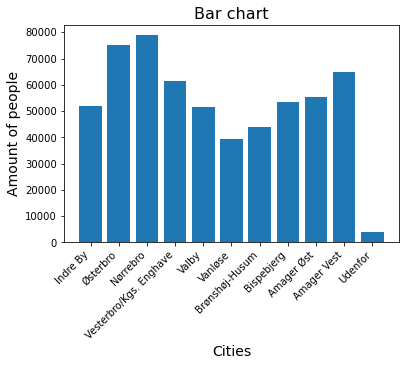

In [62]:
#5 Make a bar plot to show the size of each city area from the smallest to the largest
# AAR,BYDEL,ALDER,STATKODE,PERSONER 

number_of_people = []
for n in neighb.keys():
        number_of_people.append(find_people(n))
cities = list(neighb.values()) 


plt.bar(cities, number_of_people, align='center')

plt.title("Bar chart", fontsize=16)
plt.xlabel("Cities", fontsize=14)
plt.ylabel("Amount of people", fontsize=14)

plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [70]:
#Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
# AAR,BYDEL,ALDER,STATKODE,PERSONER

age_year_mask = (dd[:,0] == 2015) & (dd[:,2] > 65 & (dd[:,3]  == 5100))
result = sum(age_year_mask)

print(f'{result} are above 65 years old in 2015')

29203 are above 65 years old in 2015


In [78]:
#How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
age_year_notdk_mask = (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:,3] != 5100)
result2 = sum(age_year_notdk_mask)

print(f'{result2} people above 65 are from other nordic counties')

2249 people above 65 are from other nordic counties


Text(0, 0.5, 'People')

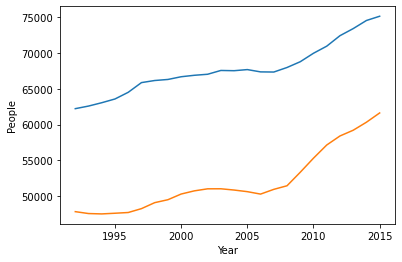

In [83]:
#Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
# AAR,BYDEL,ALDER,STATKODE,PERSONER 

years = range(1992, 2016)

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

v = []
ø = []


for y in years:
    mask = (dd[:,0] == y)
    v.append(number_of_people_per_neighbourhood(2, mask)) #Østerbro
    ø.append(number_of_people_per_neighbourhood(4, mask)) #Vesterbro

plt.plot(years, v)
plt.plot(years, ø)
plt.xlabel('Year')
plt.ylabel('People')